In [1]:
%matplotlib inline
#Modulos
import math as mt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# `El método de la simulación de Monte-Carlo para aproximar el valor de Pi`

## Explicacion resumida

* Geneamos dos listas de numeros aleatorios X e Y, entre 0 y 1, (Con 1 y 0, Maximo/Minimo) con una distribución de probabilidad uniforme.

* Calcularemos x² + y², donde x e y pertenecen a las listas X, Y respectivamente.
    * Si (x² + y²) <= 1  ----> Estamos dentro de la circunferencia unitaria.
    * Si (x² + y²) > 1  ----> Estamos fuera de la circunferencia unitaria.
    
* Estimaremos una probabilidad, dividiendo el conjunto de intentos que han caido dentro de la circunferencia, por el numero total de intentos.

* Usamos dicha probabilidad para aproxima el valor de pi

* Repetimos el experimento X veces (por ej: 1000) para obtener diferentes aproximaciones de π

* Finalmente calculamos el promedio de los X experimentos anteriores para dar una aproximacion final.

In [231]:
pi_average_1 = 0 
pi_average_2 = 0 
pi_average_3 = 0 
pi_average_4 = 0 
n = 1000 # numero de valores aleatorios 
k = 100 # veces que se va a repetir el experimento
pi_value_list_1 = [] 
pi_value_list_2 = []
pi_value_list_3 = []
pi_value_list_4 = []

for i in range( k):
    
    value1 = 0
    value2 = 0
    value3 = 0
    value4 = 0
    
    x_P = np.random.uniform(0, 1, n).tolist() # x positivos
    y_P = np.random.uniform(0, 1, n).tolist() # y positivos
    x_N = np.random.uniform(0, (-1), n).tolist() # x negativos
    y_N = np.random.uniform(0, (-1), n).tolist() # y negativos
    
    
    # Primer cuadrante:
    for j in range( n):
        z = np.sqrt(x_P[j]*x_P[j] + y_P[j]*y_P[j]) 
        if z <= 1:  # Si entra entonces el z está dentro de la circunferencia
            value1 += 1 # esto es un contador
    float_value1 = float(value1) # Se puede prescindir de esto.
    pi_value1 = (float_value1*4)/n # Multiplicamos por 4 para cancelar 1/4 de pi
    pi_value_list_1.append(pi_value1) # apendizamos el valor de pi a la lista
    pi_average_1 += pi_value1 # sumamos 
    # para los demas cuadrantes el procedimiento es analogo.
    
    # Segundo cuadrante:
    for j in range( n):
        z = np.sqrt(x_N[j]*x_N[j] + y_P[j]*y_P[j])
        if z <= 1:  
            value2 += 1
    float_value2 = float(value2)
    pi_value2 = (float_value2*4)/n 
    pi_value_list_2.append(pi_value2)
    pi_average_2 += pi_value2    
      
        # Tercero cuadrante:
    for j in range( n):
        z = np.sqrt(x_N[j]*x_N[j] + y_N[j]*y_N[j])
        if z <= 1:  
            value3 += 1
    float_value3 = float(value3)
    pi_value3 = (float_value3*4)/n 
    pi_value_list_3.append(pi_value3)
    pi_average_3 += pi_value3
         
        # Cuarto cuadrante:
    for j in range( n):
        z = np.sqrt(x_P[j]*x_P[j] + y_N[j]*y_N[j])
        if z <= 1:  
            value4 += 1
    float_value4 = float(value4)
    pi_value4 = (float_value4*4)/n 
    pi_value_list_4.append(pi_value4)
    pi_average_4 += pi_value4    
        
# Dividimos por k:
pi1 = pi_average_1/k
pi2 = pi_average_2/k
pi3 = pi_average_3/k
pi4 = pi_average_4/k

# Hasta aca ya se puede elegir cualquiera de los resultados que antesceden, lo que sigue es opcional.

# Elegimos el mejor de los 4 cuadrantes:

R = [
    pi1,
    pi2,
    pi3,
    pi4
]

best_resoult_pi = 0
error = 0
pi_model = np.pi # Usamos la aproximacion de Numpy de Pi para poder comparar.
xs = []

for i in R: 
    xs.append(abs((i - pi_model))) 
# tomamos la distancia entre nuestro resultado
# y la aproximacion de pi de la libreria numpy y lo apendizamosa una lista xs

for j in R: 
    if abs(j - pi_model) == min(xs):
        best_resoult_pi = j
        error = float(min(xs)) 
# Si el minimo de xs es R[w] entonces R[W] es el mejor resultado de los 4 
        
print("El mejor resltado fue: {} \ncon un error de: {}".format(best_resoult_pi, error))

El mejor resltado fue: 3.144320000000001 
con un error de: 0.002727346410207776


#### Detalles:

* El valor maximo que pueden tomar los numeros de las listas, al mismo tiempo, tal que estos satisfagan la ecuacion Si (x² + y²) <= 1, es 0.7071067811865476 esto es, Sin(π/4)=Cos(π/4). Si remplazamos esto es   sqrt( Sin²(π/4) + Cos²(π/4)) <= 1


* Ver que, pi_valuex = (float_valuex*4)/n,  al multiplicar por 4 nos estamos deshaciendo del denominador (π/4)*4.

In [237]:
from sympy import *
init_printing(use_latex="mathjax")
x, y, π = symbols("x, y, π")
pi = np.pi

#### Ver que Cos(π/4) = Sin(π/4) = (sqrt(2)/2)

In [238]:
np.cos(pi/4) == np.sin(pi/4) == (np.sqrt(2)/2)

True

In [239]:
np.cos(pi/4)

0.7071067811865476

In [240]:
np.sin(pi/4)

0.7071067811865476

In [241]:
(np.sqrt(2)/2)

0.7071067811865476

#### En la ecuacion:

In [242]:
x**2 <= 1/2

 2      
x  ≤ 0.5

In [243]:
solve(x**2 <= 1/2)

-0.707106781186548 ≤ x ∧ x ≤ 0.707106781186548

# Plot

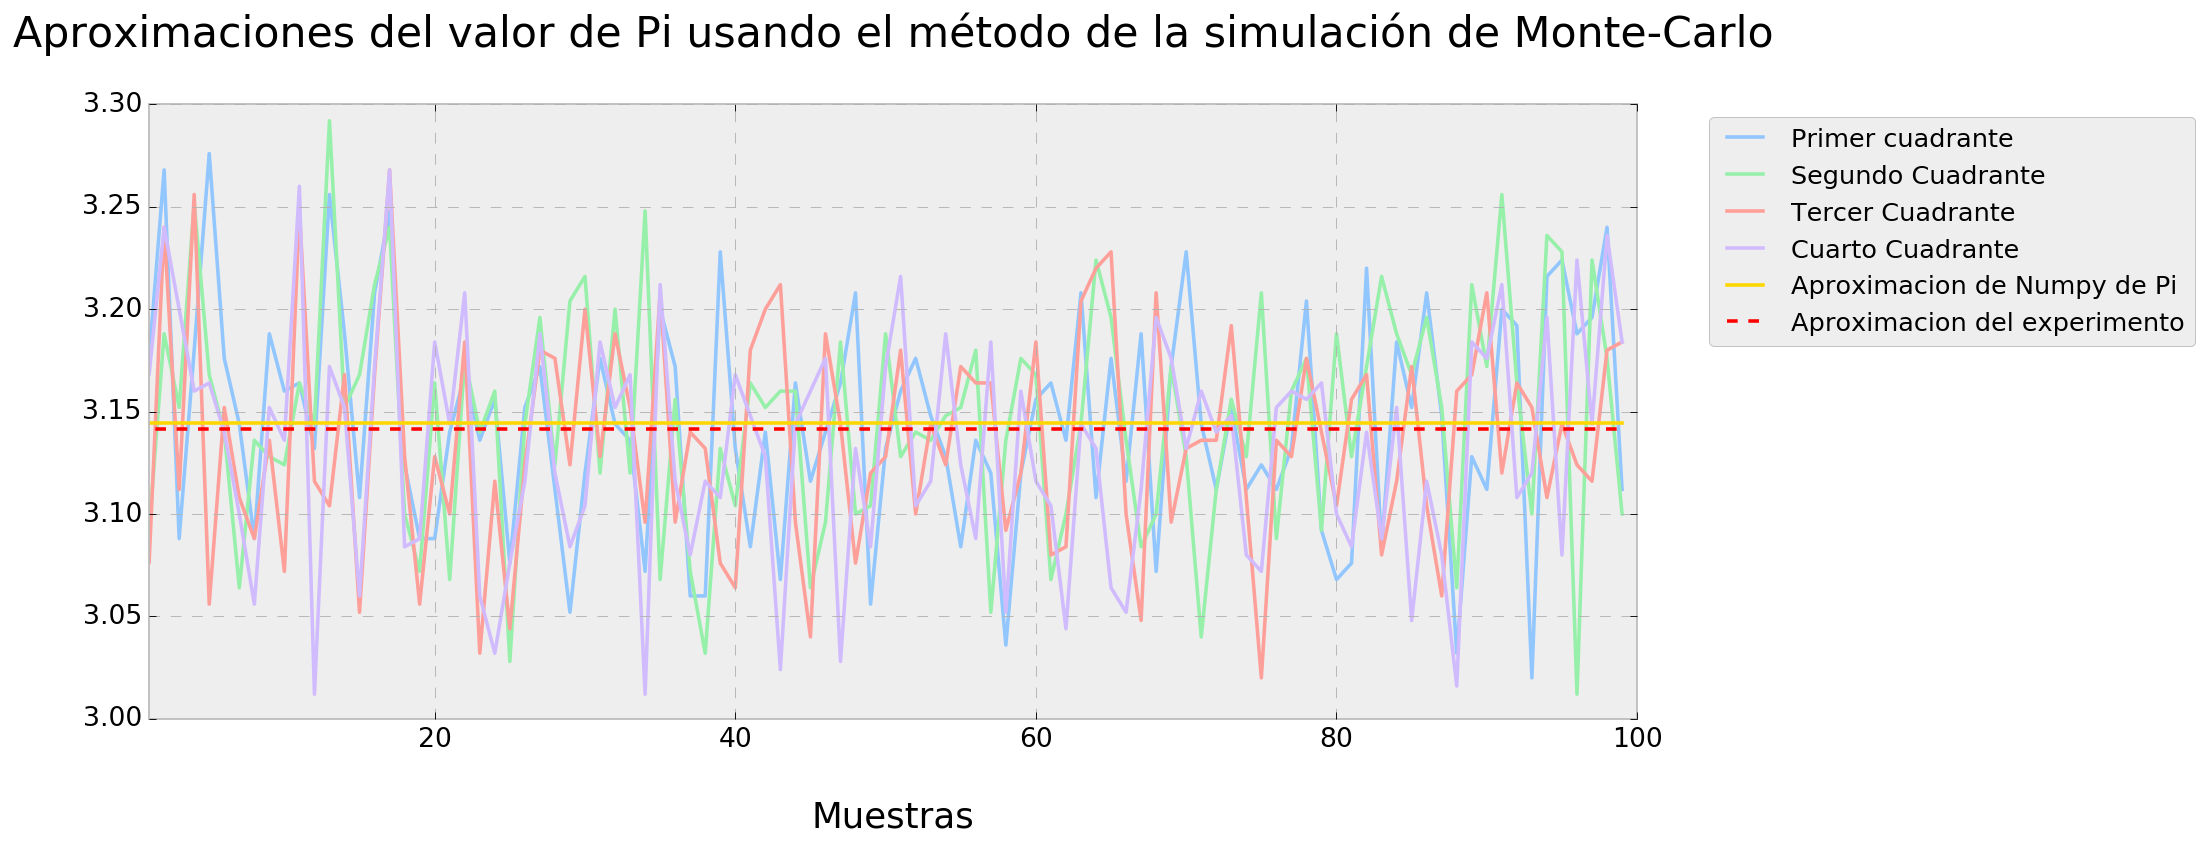

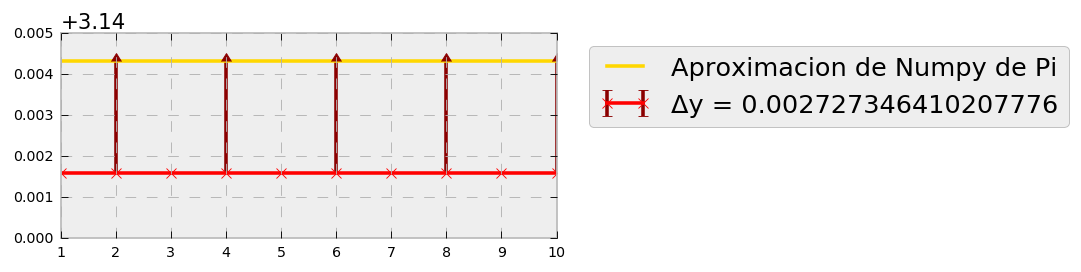

In [315]:
xx = range(100)
yy = []
      
for k in range(100):
    yy.append( float(best_resoult_pi))
    
xx1 = range(100)
yy1 = []
      
for l in range(100):
    yy1.append( float(pi))
       
plt.style.use("seaborn-pastel")
plt.figure(num=1, figsize=(15, 6), dpi=128, facecolor='w', edgecolor='k')
plt.plot(pi_value_list_1)
plt.plot(pi_value_list_2)
plt.plot(pi_value_list_3)
plt.plot(pi_value_list_4)
plt.plot(xx, yy,"gold")
plt.plot(xx1, yy1, "r--")

plt.title("Aproximaciones del valor de Pi usando el método de la simulación de Monte-Carlo\n", fontsize = 24)
plt.xlabel("\nMuestras", fontsize = 20)
plt.tick_params(axis='both', labelsize = 15)
plt.legend(["Primer cuadrante", "Segundo Cuadrante", "Tercer Cuadrante", "Cuarto Cuadrante", "Aproximacion de Numpy de Pi", "Aproximacion del experimento"], bbox_to_anchor=(1.04,1), loc = "upper left")
plt.ylim(3.0, 3.3)
plt.xlim(right=100)  
plt.xlim(left=1)

plt.figure(num=2, figsize=(5, 2), dpi=128, facecolor='w', edgecolor='k')
plt.plot(xx, yy,"gold")
#plt.plot(xx1, yy1, "r--"
plt.errorbar(xx1, yy1, yerr = error, ecolor = "darkred", lolims=True, errorevery = 2, fmt = "r-x",  label = "Error")
plt.legend(["Aproximacion de Numpy de Pi", "Δy = 0.002727346410207776"], bbox_to_anchor=(1.04,1), loc = "upper left")
plt.tick_params(axis='both', labelsize = 8)
plt.ylim(3.14, 3.145)
plt.xlim(right=10)  
plt.xlim(left=1)

plt.grid(True)
plt.show()